In [1]:
# Mount google drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from google.colab import drive
from google.colab import files
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
bond_price = pd.read_csv("/content/drive/MyDrive/UMDatathon/Malaysia_10_Year_Bond_Yield_Historical_Data.csv")
bond_price

,Date,Price,Open,High,Low,Change %
0,10/12/2023,4.096,4.096,4.096,4.095,0.66%
1,10/11/2023,4.069,4.101,4.101,4.069,-0.78%
2,10/10/2023,4.101,4.118,4.118,4.101,-0.41%
3,10/09/2023,4.118,4.139,4.139,4.118,-1.06%
4,10/08/2023,4.162,4.175,4.175,4.162,0.77%
...,...,...,...,...,...,...
3001,10/18/2013,3.766,3.766,3.766,3.766,0.00%
3002,10/17/2013,3.766,3.795,3.795,3.766,-0.03%
3003,10/16/2013,3.767,3.767,3.767,3.767,0.00%
3004,10/15/2013,3.767,3.767,3.767,3.734,0.00%


In [3]:
bond_price['Date'] = pd.to_datetime(bond_price['Date'], format='%m/%d/%Y')
bond_price.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Change %            object
dtype: object

In [60]:
interest_rate = pd.read_csv("/content/drive/MyDrive/UMDatathon/interest-rates.csv")
interest_rate

,Date,Overnight,1 Week,1 Month,3 Month,6 Month,1 Year
0,27 Jan 2015,3.25,3.26,3.28,-,-,-
1,29 Jan 2015,3.25,3.25,-,-,-,-
2,30 Jan 2015,3.24,3.25,3.28,-,-,-
3,31 Jan 2015,3.24,3.25,3.28,-,-,-
4,01 Feb 2015,3.24,3.25,3.28,-,-,-
...,...,...,...,...,...,...,...
2820,06 Oct 2023,2.96,3.02,-,-,-,-
2821,09 Oct 2023,3.00,3.02,-,-,-,-
2822,10 Oct 2023,3.00,3.02,-,-,-,-
2823,11 Oct 2023,2.96,3.02,-,-,-,-


In [61]:
interest_rate['Date'] = pd.to_datetime(interest_rate['Date'], format='%d %b %Y').dt.strftime('%m/%d/%Y')
interest_rate

,Date,Overnight,1 Week,1 Month,3 Month,6 Month,1 Year
0,01/27/2015,3.25,3.26,3.28,-,-,-
1,01/29/2015,3.25,3.25,-,-,-,-
2,01/30/2015,3.24,3.25,3.28,-,-,-
3,01/31/2015,3.24,3.25,3.28,-,-,-
4,02/01/2015,3.24,3.25,3.28,-,-,-
...,...,...,...,...,...,...,...
2820,10/06/2023,2.96,3.02,-,-,-,-
2821,10/09/2023,3.00,3.02,-,-,-,-
2822,10/10/2023,3.00,3.02,-,-,-,-
2823,10/11/2023,2.96,3.02,-,-,-,-


In [49]:
(interest_rate=='-').sum()

Date            0
Overnight       0
1 Week        118
1 Month      1532
3 Month      2788
6 Month      2825
1 Year       2825
dtype: int64

In [62]:
interest_rate_new = interest_rate.iloc[:,0:2]
interest_rate_new

,Date,Overnight
0,01/27/2015,3.25
1,01/29/2015,3.25
2,01/30/2015,3.24
3,01/31/2015,3.24
4,02/01/2015,3.24
...,...,...
2820,10/06/2023,2.96
2821,10/09/2023,3.00
2822,10/10/2023,3.00
2823,10/11/2023,2.96


In [55]:
bond_price_with_interest = bond_price[bond_price['Date'] >= '1/27/2015']
bond_price_with_interest

,Date,Price,Open,High,Low,Change %
2611,2015-01-27,3.907,3.911,3.911,3.907,-0.10%
2610,2015-01-28,3.863,3.902,3.902,3.862,-1.13%
2609,2015-01-29,3.861,3.862,3.867,3.858,-0.05%
2608,2015-01-30,3.809,3.856,3.856,3.809,-1.35%
2607,2015-02-01,3.809,3.809,3.809,3.809,0.00%
...,...,...,...,...,...,...
4,2023-10-08,4.162,4.175,4.175,4.162,0.77%
3,2023-10-09,4.118,4.139,4.139,4.118,-1.06%
2,2023-10-10,4.101,4.118,4.118,4.101,-0.41%
1,2023-10-11,4.069,4.101,4.101,4.069,-0.78%


In [65]:
interest_rate_new['Date'] = pd.to_datetime(interest_rate_new['Date'])
interest_rate_new.dtypes

Date         datetime64[ns]
Overnight           float64
dtype: object

In [67]:
bond_price_with_interest = pd.merge_asof(bond_price_with_interest, interest_rate_new, on='Date', direction='backward')

In [68]:
bond_price_with_interest

,Date,Price,Open,High,Low,Change %,Overnight
0,2015-01-27,3.907,3.911,3.911,3.907,-0.10%,3.25
1,2015-01-28,3.863,3.902,3.902,3.862,-1.13%,3.25
2,2015-01-29,3.861,3.862,3.867,3.858,-0.05%,3.25
3,2015-01-30,3.809,3.856,3.856,3.809,-1.35%,3.24
4,2015-02-01,3.809,3.809,3.809,3.809,0.00%,3.24
...,...,...,...,...,...,...,...
2607,2023-10-08,4.162,4.175,4.175,4.162,0.77%,2.96
2608,2023-10-09,4.118,4.139,4.139,4.118,-1.06%,3.00
2609,2023-10-10,4.101,4.118,4.118,4.101,-0.41%,3.00
2610,2023-10-11,4.069,4.101,4.101,4.069,-0.78%,2.96


In [52]:
stock_price = pd.read_csv("/content/drive/MyDrive/UMDatathon/TENA Historical Data.csv")
stock_price

,Date,Price,Open,High,Low,Vol.,Change %
0,10/13/2023,10.00,9.97,10.02,9.97,258.60K,0.00%
1,10/12/2023,10.00,10.00,10.08,9.98,3.66M,0.10%
2,10/11/2023,9.99,9.99,10.02,9.98,2.92M,0.20%
3,10/10/2023,9.97,9.95,9.99,9.94,1.90M,0.00%
4,10/09/2023,9.97,10.00,10.00,9.94,1.17M,-0.50%
...,...,...,...,...,...,...,...
2444,10/21/2013,9.16,9.16,9.19,9.11,6.01M,0.11%
2445,10/18/2013,9.15,9.16,9.18,9.14,5.30M,0.11%
2446,10/17/2013,9.14,9.18,9.25,9.11,2.37M,0.44%
2447,10/16/2013,9.10,9.15,9.22,9.09,9.66M,0.00%


In [73]:
stock_price_new = stock_price.iloc[:,0:2]
stock_price_new.rename(columns={'Price':'Stock_Price'},inplace = True)
stock_price_new

,Date,Stock_Price
0,10/13/2023,10.00
1,10/12/2023,10.00
2,10/11/2023,9.99
3,10/10/2023,9.97
4,10/09/2023,9.97
...,...,...
2444,10/21/2013,9.16
2445,10/18/2013,9.15
2446,10/17/2013,9.14
2447,10/16/2013,9.10


In [79]:
stock_price_new['Date'] = pd.to_datetime(stock_price_new['Date'])
stock_price_new.dtypes

Date           datetime64[ns]
Stock_Price           float64
dtype: object

In [81]:
stock_price_new = stock_price_new.sort_values(by='Date')
stock_price_new

,Date,Stock_Price
2448,2013-10-14,9.10
2447,2013-10-16,9.10
2446,2013-10-17,9.14
2445,2013-10-18,9.15
2444,2013-10-21,9.16
...,...,...
4,2023-10-09,9.97
3,2023-10-10,9.97
2,2023-10-11,9.99
1,2023-10-12,10.00


In [82]:
bond_price_complete = pd.merge_asof(bond_price_with_interest, stock_price_new, on='Date', direction='backward')
bond_price_complete

,Date,Price,Open,High,Low,Change %,Overnight,Stock_Price
0,2015-01-27,3.907,3.911,3.911,3.907,-0.10%,3.25,15.00
1,2015-01-28,3.863,3.902,3.902,3.862,-1.13%,3.25,14.80
2,2015-01-29,3.861,3.862,3.867,3.858,-0.05%,3.25,14.56
3,2015-01-30,3.809,3.856,3.856,3.809,-1.35%,3.24,14.50
4,2015-02-01,3.809,3.809,3.809,3.809,0.00%,3.24,14.50
...,...,...,...,...,...,...,...,...
2607,2023-10-08,4.162,4.175,4.175,4.162,0.77%,2.96,10.02
2608,2023-10-09,4.118,4.139,4.139,4.118,-1.06%,3.00,9.97
2609,2023-10-10,4.101,4.118,4.118,4.101,-0.41%,3.00,9.97
2610,2023-10-11,4.069,4.101,4.101,4.069,-0.78%,2.96,9.99


In [83]:
bond_price_complete.isnull().sum()

Date           0
Price          0
Open           0
High           0
Low            0
Change %       0
Overnight      0
Stock_Price    0
dtype: int64

In [87]:
bond_price_complete.to_csv("/content/drive/MyDrive/UMDatathon/bond_price_complete.csv")

In [137]:
correlation = bond_price_complete['Price'].corr(bond_price_complete['Stock_Price'])
correlation

0.2464061008811079

Text(0.5, 0, 'Date')

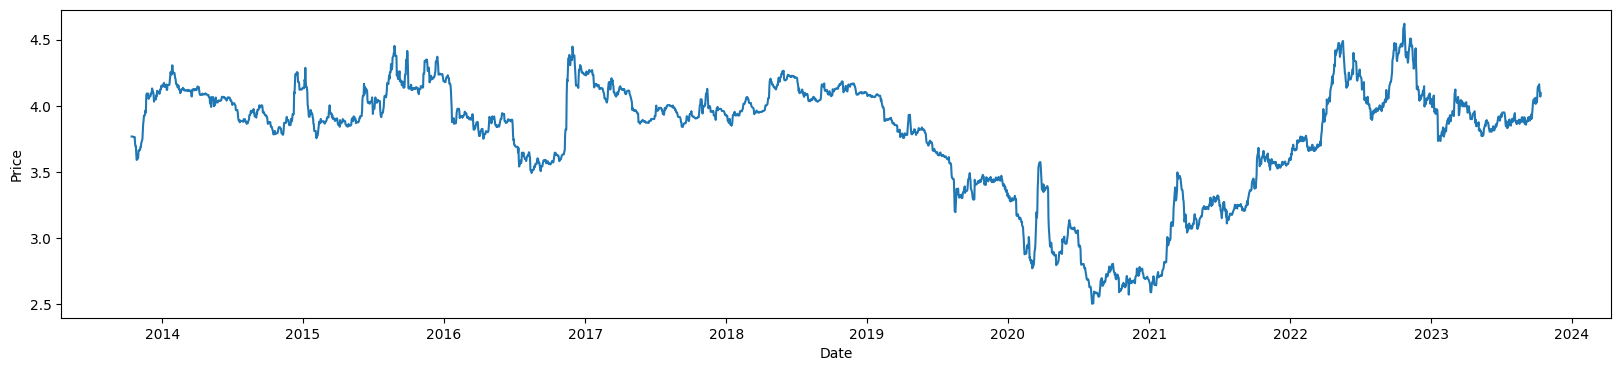

In [34]:
bond_price.sort_values(by=['Date'],inplace=True)
plt.figure(figsize=(20,4))
plt.plot(bond_price['Date'],bond_price['Price'])
plt.ylabel("Price")
plt.xlabel("Date")

Text(0.5, 0, 'Date')

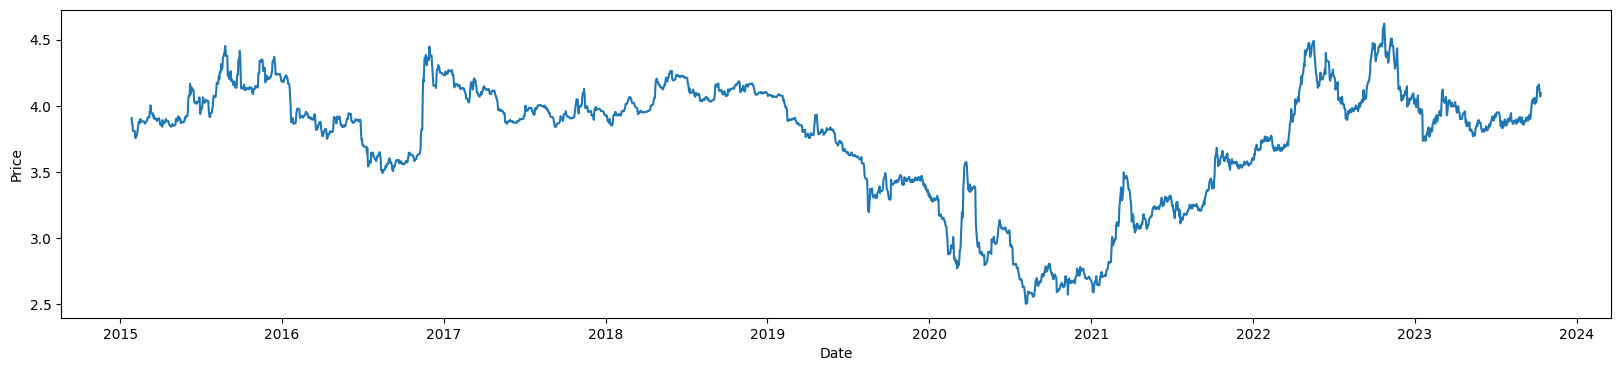

In [88]:
bond_price_complete.sort_values(by=['Date'],inplace=True)
plt.figure(figsize=(20,4))
plt.plot(bond_price_complete['Date'],bond_price_complete['Price'])
plt.ylabel("Price")
plt.xlabel("Date")

In [269]:
# define the number of days out you want to predict
days_out = 180
# Group by symbol, then apply the rolling function and grab the Min and Max.
bond_price_complete_smoothed= bond_price_complete[['Price','Open','High','Low']].transform(lambda x: x.ewm(span = days_out).mean())
#bond_price_complete_smoothed= bond_price_complete[['Price','Open','High','Low']]


In [164]:
bond_price_complete_smoothed

,Price,Open,High,Low
0,3.907000,3.911000,3.911000,3.907000
1,3.884267,3.906350,3.906350,3.883750
2,3.875989,3.890571,3.892350,3.874588
3,3.857531,3.881045,3.882334,3.856516
4,3.846489,3.864653,3.865649,3.845705
...,...,...,...,...
2607,4.008070,4.001178,4.011677,3.997943
2608,4.015162,4.010070,4.019891,4.005688
2609,4.020700,4.017033,4.026221,4.011837
2610,4.023816,4.022450,4.031045,4.015525


In [270]:
# create a new column that will house the flag, and for each group calculate the diff compared to 30 days ago. Then use Numpy to define the sign.
days_out = 180
bond_price_complete_smoothed['Signal_Flag'] = bond_price_complete_smoothed['Price'].transform(lambda x : np.sign(x.diff(days_out)))
bond_price_complete_smoothed

,Price,Open,High,Low,Signal_Flag
0,3.907000,3.911000,3.911000,3.907000,NaN
1,3.884878,3.906475,3.906475,3.884375,NaN
2,3.876830,3.891485,3.893170,3.875485,NaN
3,3.859589,3.882465,3.883722,3.858586,NaN
4,3.849245,3.867444,3.868444,3.848447,NaN
...,...,...,...,...,...
2607,3.937056,3.935657,3.942916,3.930435,-1.0
2608,3.939055,3.937904,3.945083,3.932508,-1.0
2609,3.940845,3.939894,3.946994,3.934369,-1.0
2610,3.942261,3.941674,3.948696,3.935857,-1.0


In [271]:
# Calculate the 14 day RSI
n = 14

# First make a copy of the data frame twice
up_df, down_df = bond_price_complete_smoothed[['Signal_Flag']].copy(), bond_price_complete_smoothed[['Signal_Flag']].copy()

# For up days, if the change is less than 0 set to 0.
up_df.loc['Signal_Flag'] = up_df.loc[(up_df['Signal_Flag'] < 0), 'Signal_Flag'] = 0

# For down days, if the change is greater than 0 set to 0.
down_df.loc['Signal_Flag'] = down_df.loc[(down_df['Signal_Flag'] > 0), 'Signal_Flag'] = 0

# We need change in price to be absolute.
down_df['Signal_Flag'] = down_df['Signal_Flag'].abs()

# Calculate the EWMA (Exponential Weighted Moving Average), meaning older values are given less weight compared to newer values.
ewma_up = up_df['Signal_Flag'].transform(lambda x: x.ewm(span = n).mean())
ewma_down = down_df['Signal_Flag'].transform(lambda x: x.ewm(span = n).mean())

# Calculate the Relative Strength
relative_strength = ewma_up / ewma_down

# Calculate the Relative Strength Index
relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

# Add the info to the data frame.
bond_price_complete_smoothed['down_days'] = down_df['Signal_Flag']
bond_price_complete_smoothed['up_days'] = up_df['Signal_Flag']
bond_price_complete_smoothed['RSI'] = relative_strength_index

bond_price_complete_smoothed

,Price,Open,High,Low,Signal_Flag,down_days,up_days,RSI
0,3.907000,3.911000,3.911000,3.907000,NaN,NaN,NaN,NaN
1,3.884878,3.906475,3.906475,3.884375,NaN,NaN,NaN,NaN
2,3.876830,3.891485,3.893170,3.875485,NaN,NaN,NaN,NaN
3,3.859589,3.882465,3.883722,3.858586,NaN,NaN,NaN,NaN
4,3.849245,3.867444,3.868444,3.848447,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2607,3.937056,3.935657,3.942916,3.930435,-1.0,1.0,0.0,0.000002
2608,3.939055,3.937904,3.945083,3.932508,-1.0,1.0,0.0,0.000002
2609,3.940845,3.939894,3.946994,3.934369,-1.0,1.0,0.0,0.000001
2610,3.942261,3.941674,3.948696,3.935857,-1.0,1.0,0.0,0.000001


In [272]:
# Calculate the Stochastic Oscillator
n = 14

# Make a copy of the high and low column.
low_14, high_14 = bond_price_complete_smoothed[['Low']].copy(), bond_price_complete_smoothed[['High']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14['Low'].transform(lambda x: x.rolling(window = n).min())
high_14 = high_14['High'].transform(lambda x: x.rolling(window = n).max())

# Calculate the Stochastic Oscillator.
k_percent = 100 * ((bond_price_complete_smoothed['Price'] - low_14) / (high_14 - low_14))

# Add the info to the data frame.
bond_price_complete_smoothed['low_14'] = low_14
bond_price_complete_smoothed['high_14'] = high_14
bond_price_complete_smoothed['k_percent'] = k_percent

bond_price_complete_smoothed

,Price,Open,High,Low,Signal_Flag,down_days,up_days,RSI,low_14,high_14,k_percent
0,3.907000,3.911000,3.911000,3.907000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.884878,3.906475,3.906475,3.884375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.876830,3.891485,3.893170,3.875485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.859589,3.882465,3.883722,3.858586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.849245,3.867444,3.868444,3.848447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2607,3.937056,3.935657,3.942916,3.930435,-1.0,1.0,0.0,0.000002,3.910434,3.942916,81.958556
2608,3.939055,3.937904,3.945083,3.932508,-1.0,1.0,0.0,0.000002,3.911965,3.945083,81.799652
2609,3.940845,3.939894,3.946994,3.934369,-1.0,1.0,0.0,0.000001,3.913181,3.946994,81.815087
2610,3.942261,3.941674,3.948696,3.935857,-1.0,1.0,0.0,0.000001,3.914383,3.948696,81.247218


In [273]:
# Calculate the MACD
ema_26 = bond_price_complete_smoothed['Price'].transform(lambda x: x.ewm(span = 26).mean())
ema_12 = bond_price_complete_smoothed['Price'].transform(lambda x: x.ewm(span = 12).mean())
macd = ema_12 - ema_26

# Calculate the EMA
ema_9_macd = macd.ewm(span = 9).mean()

# Store the data in the data frame.
bond_price_complete_smoothed['MACD'] = macd
bond_price_complete_smoothed['MACD_EMA'] = ema_9_macd

bond_price_complete_smoothed

,Price,Open,High,Low,Signal_Flag,down_days,up_days,RSI,low_14,high_14,k_percent,MACD,MACD_EMA
0,3.907000,3.911000,3.911000,3.907000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
1,3.884878,3.906475,3.906475,3.884375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000496,-0.000276
2,3.876830,3.891485,3.893170,3.875485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000882,-0.000524
3,3.859589,3.882465,3.883722,3.858586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001658,-0.000908
4,3.849245,3.867444,3.868444,3.848447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002457,-0.001369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,3.937056,3.935657,3.942916,3.930435,-1.0,1.0,0.0,0.000002,3.910434,3.942916,81.958556,0.004143,0.002184
2608,3.939055,3.937904,3.945083,3.932508,-1.0,1.0,0.0,0.000002,3.911965,3.945083,81.799652,0.004730,0.002693
2609,3.940845,3.939894,3.946994,3.934369,-1.0,1.0,0.0,0.000001,3.913181,3.946994,81.815087,0.005278,0.003210
2610,3.942261,3.941674,3.948696,3.935857,-1.0,1.0,0.0,0.000001,3.914383,3.948696,81.247218,0.005761,0.003720


In [274]:
# Create a column we wish to predict

# Grab the `Close` column.
close_groups = bond_price_complete_smoothed['Price']

# Apply the lambda function which will return -1.0 for down, 1.0 for up and 0.0 for no change.
close_groups = close_groups.transform(lambda x : np.sign(x.diff()))

# add the data to the main dataframe.
bond_price_complete_smoothed['Prediction'] = close_groups
bond_price_complete_smoothed

,Price,Open,High,Low,Signal_Flag,down_days,up_days,RSI,low_14,high_14,k_percent,MACD,MACD_EMA,Prediction
0,3.907000,3.911000,3.911000,3.907000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
1,3.884878,3.906475,3.906475,3.884375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000496,-0.000276,-1.0
2,3.876830,3.891485,3.893170,3.875485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000882,-0.000524,-1.0
3,3.859589,3.882465,3.883722,3.858586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001658,-0.000908,-1.0
4,3.849245,3.867444,3.868444,3.848447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002457,-0.001369,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,3.937056,3.935657,3.942916,3.930435,-1.0,1.0,0.0,0.000002,3.910434,3.942916,81.958556,0.004143,0.002184,1.0
2608,3.939055,3.937904,3.945083,3.932508,-1.0,1.0,0.0,0.000002,3.911965,3.945083,81.799652,0.004730,0.002693,1.0
2609,3.940845,3.939894,3.946994,3.934369,-1.0,1.0,0.0,0.000001,3.913181,3.946994,81.815087,0.005278,0.003210,1.0
2610,3.942261,3.941674,3.948696,3.935857,-1.0,1.0,0.0,0.000001,3.914383,3.948696,81.247218,0.005761,0.003720,1.0


In [275]:
# We need to remove all rows that have an NaN value.
print('Before NaN Drop we have {} rows and {} columns'.format(bond_price_complete_smoothed.shape[0], bond_price_complete_smoothed.shape[1]))

# Any row that has a `NaN` value will be dropped.
bond_price_complete_smoothed = bond_price_complete_smoothed.dropna()

# Display how much we have left now.
print('After NaN Drop we have {} rows and {} columns\n'.format(bond_price_complete_smoothed.shape[0], bond_price_complete_smoothed.shape[1]))



Before NaN Drop we have 2612 rows and 14 columns
After NaN Drop we have 2432 rows and 14 columns



In [276]:
x = bond_price_complete_smoothed[['Price','RSI','k_percent','MACD']]
x

,Price,RSI,k_percent,MACD
180,4.051779,100.000000,82.977411,0.021712
181,4.053705,100.000000,82.156897,0.021858
182,4.055603,100.000000,81.912081,0.021874
183,4.057931,100.000000,81.712227,0.021823
184,4.060504,100.000000,81.292748,0.021740
...,...,...,...,...
2607,3.937056,0.000002,81.958556,0.004143
2608,3.939055,0.000002,81.799652,0.004730
2609,3.940845,0.000001,81.815087,0.005278
2610,3.942261,0.000001,81.247218,0.005761


Text(0.5, 0, 'Date')

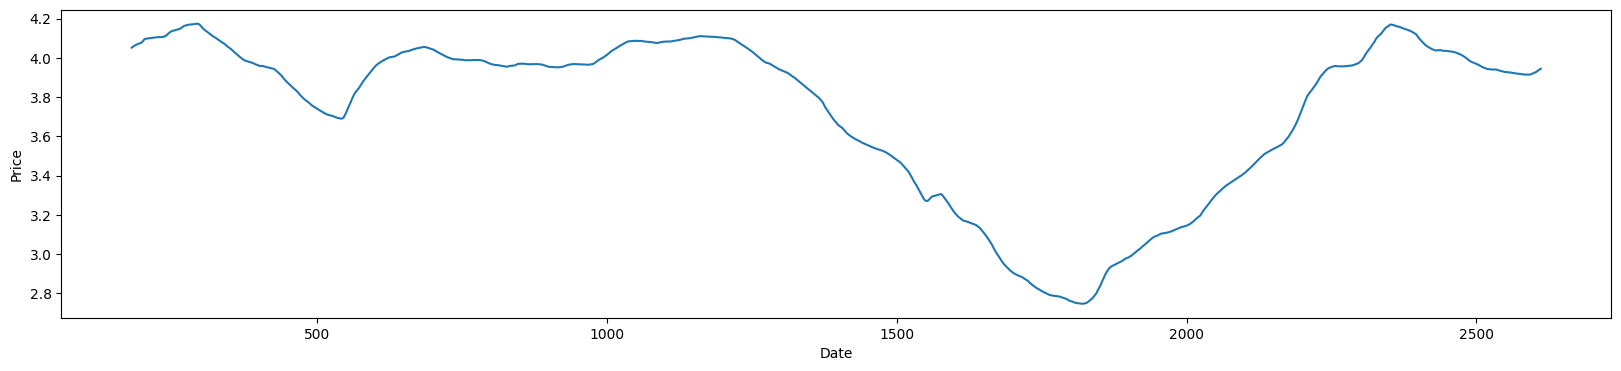

In [286]:
bond_price_complete.sort_values(by=['Date'],inplace=True)
plt.figure(figsize=(20,4))
plt.plot(x['Price'])
plt.ylabel("Price")
plt.xlabel("Date")

In [277]:
y = bond_price_complete_smoothed[['Prediction']]
y

,Prediction
180,1.0
181,1.0
182,1.0
183,1.0
184,1.0
...,...
2607,1.0
2608,1.0
2609,1.0
2610,1.0


In [307]:
(y['Prediction']==-1.0)
indices = np.where(y['Prediction'] == -1.0)[0]

In [309]:
indices

array([  46,   47,   48, ..., 2408, 2410, 2411])

In [280]:
x_new = [x,bond_price_complete.iloc[180:,-2:]]
x_df = pd.concat(x_new, axis = 1)
x_df

,Price,RSI,k_percent,MACD,Overnight,Stock_Price
180,4.051779,100.000000,82.977411,0.021712,3.25,11.20
181,4.053705,100.000000,82.156897,0.021858,3.24,11.08
182,4.055603,100.000000,81.912081,0.021874,3.24,11.08
183,4.057931,100.000000,81.712227,0.021823,3.18,11.00
184,4.060504,100.000000,81.292748,0.021740,3.16,11.02
...,...,...,...,...,...,...
2607,3.937056,0.000002,81.958556,0.004143,2.96,10.02
2608,3.939055,0.000002,81.799652,0.004730,3.00,9.97
2609,3.940845,0.000001,81.815087,0.005278,3.00,9.97
2610,3.942261,0.000001,81.247218,0.005761,2.96,9.99


In [281]:
x_df['PriceRatio'] = x_df['Price'] / x_df['Stock_Price']
x_df

,Price,RSI,k_percent,MACD,Overnight,Stock_Price,PriceRatio
180,4.051779,100.000000,82.977411,0.021712,3.25,11.20,0.361766
181,4.053705,100.000000,82.156897,0.021858,3.24,11.08,0.365858
182,4.055603,100.000000,81.912081,0.021874,3.24,11.08,0.366029
183,4.057931,100.000000,81.712227,0.021823,3.18,11.00,0.368903
184,4.060504,100.000000,81.292748,0.021740,3.16,11.02,0.368467
...,...,...,...,...,...,...,...
2607,3.937056,0.000002,81.958556,0.004143,2.96,10.02,0.392920
2608,3.939055,0.000002,81.799652,0.004730,3.00,9.97,0.395091
2609,3.940845,0.000001,81.815087,0.005278,3.00,9.97,0.395270
2610,3.942261,0.000001,81.247218,0.005761,2.96,9.99,0.394621


In [282]:
x_train = x_df.iloc[:1704,:]
x_test = x_df.iloc[1704:,:]
y_train = y.iloc[:1704,:]
y_test = y.iloc[1704:,:]


In [283]:
x_train

,Price,RSI,k_percent,MACD,Overnight,Stock_Price,PriceRatio
180,4.051779,100.000000,82.977411,0.021712,3.25,11.20,0.361766
181,4.053705,100.000000,82.156897,0.021858,3.24,11.08,0.365858
182,4.055603,100.000000,81.912081,0.021874,3.24,11.08,0.366029
183,4.057931,100.000000,81.712227,0.021823,3.18,11.00,0.368903
184,4.060504,100.000000,81.292748,0.021740,3.16,11.02,0.368467
...,...,...,...,...,...,...,...
1879,2.951632,76.093228,72.338095,0.025178,1.75,10.12,0.291663
1880,2.953018,79.280798,70.693259,0.024342,1.75,10.08,0.292958
1881,2.954520,82.043358,70.496414,0.023530,1.75,10.08,0.293107
1882,2.955785,84.437577,69.877129,0.022726,1.72,10.02,0.294989


In [284]:
x_test

,Price,RSI,k_percent,MACD,Overnight,Stock_Price,PriceRatio
1884,2.958757,88.310891,69.136533,0.021222,1.72,10.02,0.295285
1885,2.959997,89.869439,68.715320,0.020503,1.71,10.04,0.294820
1886,2.961411,91.220181,68.795931,0.019819,1.70,10.00,0.296141
1887,2.963031,92.390823,69.304863,0.019186,1.70,10.00,0.296303
1888,2.964589,93.405380,69.648107,0.018596,1.70,10.00,0.296459
...,...,...,...,...,...,...,...
2607,3.937056,0.000002,81.958556,0.004143,2.96,10.02,0.392920
2608,3.939055,0.000002,81.799652,0.004730,3.00,9.97,0.395091
2609,3.940845,0.000001,81.815087,0.005278,3.00,9.97,0.395270
2610,3.942261,0.000001,81.247218,0.005761,2.96,9.99,0.394621


In [315]:
x_test.loc[[2411]]

,Price,RSI,k_percent,MACD,Overnight,Stock_Price,PriceRatio
2411,4.067445,100.0,15.453822,-0.016651,2.75,9.51,0.427702


In [300]:
random_forest = RandomForestClassifier(n_estimators = 300, oob_score = True, criterion = "gini", random_state = 0)
random_forest.fit(x_train[['Price','RSI','k_percent','MACD','Overnight','Stock_Price']],y_train)
y_pred = random_forest.predict(x_test[['Price','RSI','k_percent','MACD','Overnight','Stock_Price']])
accuracy = accuracy_score(y_test,y_pred,normalize = True) *100
print(accuracy)

<ipython-input-300-15c7d48dc09f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train[['Price','RSI','k_percent','MACD','Overnight','Stock_Price']],y_train)


95.32967032967034


In [302]:
import pickle
filename = 'finalized_class_model.sav'
pickle.dump(random_forest,open(filename,'wb'))